### Import Library

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

### Atur dataset

In [8]:
dataset_path = '../../data/raw copy'

# Augmentasi
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Untuk training
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Untuk validasi
validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 412 images belonging to 8 classes.
Found 99 images belonging to 8 classes.


### Bangun model

In [9]:
# Buat model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(8, activation='softmax'))

### Compile model

In [10]:

# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Train model

In [11]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10
13/13 [==============================] - 11s 762ms/step - loss: 2.2205 - accuracy: 0.1869 - val_loss: 1.9616 - val_accuracy: 0.2525
Epoch 2/10
13/13 [==============================] - 9s 656ms/step - loss: 1.6773 - accuracy: 0.3519 - val_loss: 1.6337 - val_accuracy: 0.4343
Epoch 3/10
13/13 [==============================] - 8s 627ms/step - loss: 1.3525 - accuracy: 0.4976 - val_loss: 1.4742 - val_accuracy: 0.4747
Epoch 4/10
13/13 [==============================] - 8s 634ms/step - loss: 1.0212 - accuracy: 0.6432 - val_loss: 1.0626 - val_accuracy: 0.6364
Epoch 5/10
13/13 [==============================] - 8s 597ms/step - loss: 0.6956 - accuracy: 0.7573 - val_loss: 1.3960 - val_accuracy: 0.5455
Epoch 6/10
13/13 [==============================] - 8s 602ms/step - loss: 0.5611 - accuracy: 0.8131 - val_loss: 1.0836 - val_accuracy: 0.6263
Epoch 7/10
13/13 [==============================] - 8s 593ms/step - loss: 0.3229 - accuracy: 0.9053 - val_loss: 1.3404 - val_accuracy: 0.5556
Epoch

### Visualisasi

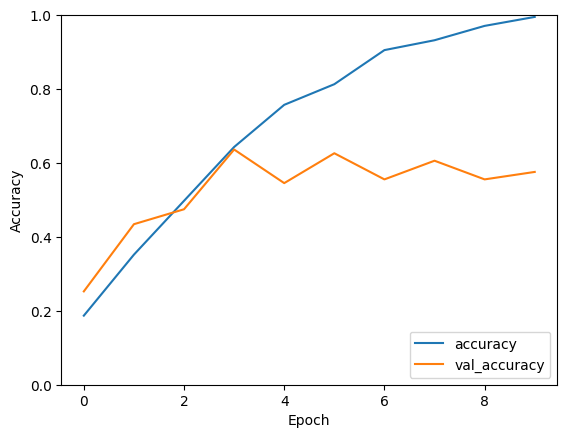

In [12]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()